In [1]:
using DitherPunk
using Images
using ColorSchemes
using TestImages

# Color dithering
## Defining a color scheme
Let's assume we want to recreate an image by stacking ``20 \times 20`` Rubik's cubes.
Dithering algorithms are perfect for this task!
We start out by defining a custom color scheme:

In [2]:
white = RGB{Float32}(1, 1, 1)
yellow = RGB{Float32}(1, 1, 0)
green = RGB{Float32}(0, 0.5, 0)
orange = RGB{Float32}(1, 0.5, 0)
red = RGB{Float32}(1, 0, 0)
blue = RGB{Float32}(0, 0, 1)

rubiks_colors = ColorScheme([white, yellow, green, orange, red, blue])

Any of the predefined color schemes from
[ColorSchemes.jl](https://juliagraphics.github.io/ColorSchemes.jl/stable/basics/#Pre-defined-schemes)
can also be used!

## Dithering the image
Now we only have to pick an image

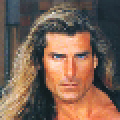

In [3]:
img = testimage("fabio_color_256")
img = imresize(img, 60, 60)

and run an `ErrorDiffusion` algorithm of our choice, e.g. `FloydSteinberg`.
For an overview of all error diffusion algorithms, check out the gallery.

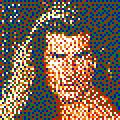

In [4]:
d = dither(img, FloydSteinberg(), rubiks_colors)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*